## Modelagem e normalização de bancos de dados relacionais

Certo dia, um dos gestores do banco em que você trabalha como cientista de dados procurouvocêpedindo ajuda para projetar um pequeno banco de dados com o objetivo de mapear os clientes dacompanhiapelos diferentes produtos financeiros que eles contrataram.

O gestor explicou que o banco tinha uma grande quantidade de clientes e oferecia uma variedadedeprodutos financeiros, como cartões de crédito, empréstimos, seguros e investimentos. No entanto, elesestavam tendo dificuldades para entender quais produtos eram mais populares entre os clientes ecomoessesprodutos estavam interagindo entre si.

Como ponto de partida, o gestor deixou claro que um cliente pode contratar vários produtos diferentesaopasso que um mesmo produto pode também estar associado a vários clientes diferentes e elaborouumrústicoesboço de banco de dados com duas tabelas, da seguinte forma:

Tabela 1

Nome da tabela: cliente
Colunas: codigo_cliente, nome_cliente, sobrenome_cliente, telefone_cliente, municipio_cliente, codigo_tipo_cliente, tipo_cliente

Tabela 2

Nome da tabela: produto
Colunas: codigo_produto, nome_produto, descricao_produto, codigo_tipo_produto, tipo_produto, codigo_diretor_responsavel, nome_diretor_responsavel, email_diretor_responsavel

*1) Ainda sem fazer normalizações, apresente o modelo conceitual deste esboço oferecido pelogestor, destacando atributos chaves e apresentando também a cardinalidade dos relacionamentos.*

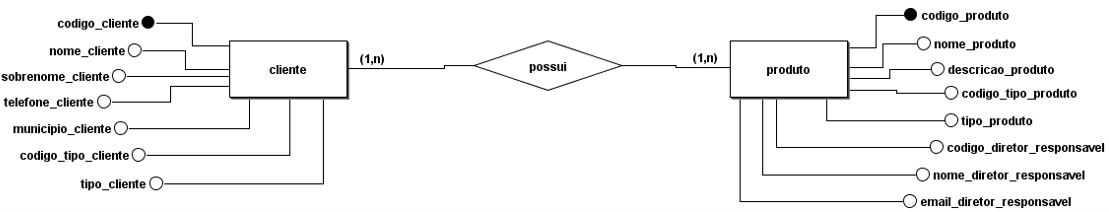

*2) Agora apresente um modelo lógico que expresse as mesmas informações e relacionamentos descritosnomodelo original, mas decompondo-os quando necessário para que sejam respeitadas as 3 primeirasformasnormais. Destaque atributos chaves e apresente também a cardinalidade dos relacionamentos.*

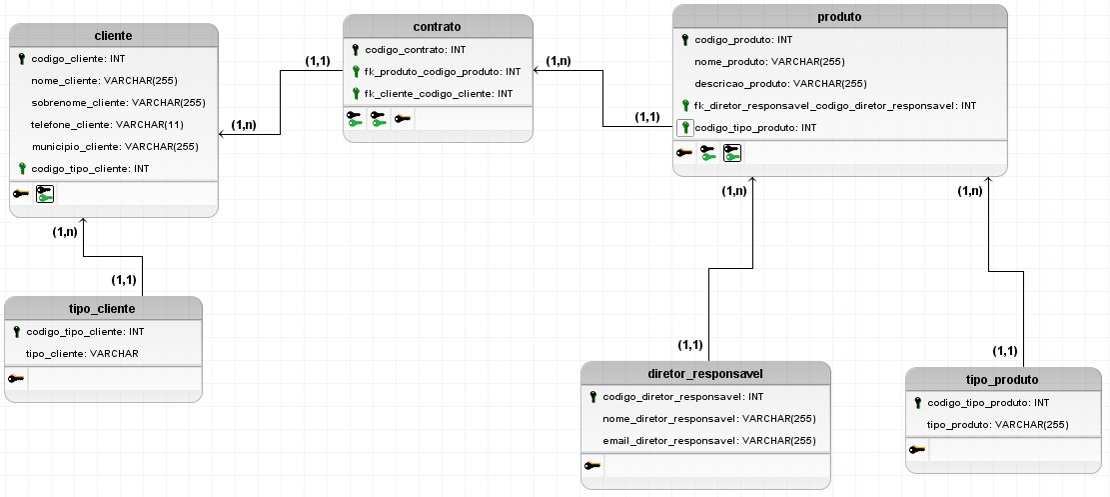

In [ ]:
CREATE TABLE cliente (
    codigo_cliente INT PRIMARY KEY,
    nome_cliente VARCHAR(255),
    sobrenome_cliente VARCHAR(255),
    telefone_cliente VARCHAR(15),
    municipio_cliente VARCHAR(255),
    codigo_tipo_cliente INT
);

CREATE TABLE produto (
    codigo_produto INT PRIMARY KEY,
    nome_produto VARCHAR(255),
    descricao_produto VARCHAR(255),
    fk_diretor_responsavel_codigo_diretor_responsavel INT,
    codigo_tipo_produto INT
);

CREATE TABLE contrato (
    codigo_contrato INT PRIMARY KEY,
    fk_produto_codigo_produto INT,
    fk_cliente_codigo_cliente INT
);

CREATE TABLE diretor_responsavel (
    codigo_diretor_responsavel INT PRIMARY KEY,
    nome_diretor_responsavel VARCHAR(255),
    email_diretor_responsavel VARCHAR(255)
);

CREATE TABLE tipo_produto (
    codigo_tipo_produto INT PRIMARY KEY,
    tipo_produto VARCHAR(255)
);

CREATE TABLE tipo_cliente (
    codigo_tipo_cliente INT PRIMARY KEY,
    tipo_cliente VARCHAR(255)
);


ALTER TABLE cliente ADD CONSTRAINT FK_cliente_2
    FOREIGN KEY (codigo_tipo_cliente)
    REFERENCES tipo_cliente (codigo_tipo_cliente);

ALTER TABLE produto ADD CONSTRAINT FK_produto_2
    FOREIGN KEY (fk_diretor_responsavel_codigo_diretor_responsavel)
    REFERENCES diretor_responsavel (codigo_diretor_responsavel);

ALTER TABLE produto ADD CONSTRAINT FK_produto_3
    FOREIGN KEY (codigo_tipo_produto)
    REFERENCES tipo_produto (tipo_produto);

ALTER TABLE contrato ADD CONSTRAINT FK_contrato_1
    FOREIGN KEY (fk_produto_codigo_produto)
    REFERENCES produto (codigo_produto)
    ON DELETE RESTRICT;

ALTER TABLE contrato ADD CONSTRAINT FK_contrato_2
    FOREIGN KEY (fk_cliente_codigo_cliente)
    REFERENCES cliente (codigo_cliente)
    ON DELETE RESTRICT;

### Consultas SQL simples e complexas em um banco de dados relacional

Um exemplo de modelo de banco de dados com relacionamento muitos-para-muitos pode ser odeume-commerce que tem produtos e categorias, onde um produto pode pertencer a várias categoriaseumacategoria pode estar associada a vários produtos.

Nesse caso, teríamos duas tabelas: "produtos" e"categorias", com uma tabela intermediária "produtos_categorias" para relacionar os produtos às suas categorias.

```
CREATE TABLE produtos (
id INT PRIMARY KEY AUTO_INCREMENT,
nome VARCHAR(100) NOT NULL,
preco DECIMAL(10, 2) NOT NULL
);
CREATE TABLE categorias (
id INT PRIMARY KEY AUTO_INCREMENT,
nome VARCHAR(100) NOT NULL
);
CREATE TABLE produtos_categorias (
produto_id INTEGER REFERENCES produtos(id),
categoria_id INTEGER REFERENCES categorias(id)
);
```


Assim, usando o subconjunto da "structured query language" chamado de DQL, produza consultas de modo a atender cada uma das seguintes solicitações:

*3) Liste os nomes de todos os produtos que custam mais de 100 reais, ordenando-os primeiramente pelo preço e em segundo lugar pelo nome. Use alias para mostrar o nome da coluna nome como "Produto" edacolunapreco como "Valor". A resposta da consulta não deve mostrar outras colunas de dados.*

In [ ]:
SELECT nome AS Produto, preco AS Valor
FROM produtos
WHERE preco > 100
ORDER BY 2, 1;

*4) Liste todos os ids e preços de produtos cujo preço seja maior do que a média de todos os preços encontrados na tabela "produtos".*

In [ ]:
SELECT id, preco
FROM produtos
WHERE preco > (SELECT AVG(preco) FROM produtos);

*5) Para cada categoria, mostre o preço médio do conjunto de produtos a ela associados. Caso uma categoria não tenha nenhum produto a ela associada, esta categoria não deve aparecer no resultado final. A consulta deve estar ordenada pelos nomes das categorias.*

In [ ]:
SELECT c.nome AS Categoria, AVG(p.preco) AS 'Preco Médio'
FROM categorias c
JOIN produtos_categorias pc ON c.id = pc.categoria_id
JOIN produtos p ON pc.produto_id = p.id
GROUP BY 1
ORDER BY 1;

### Inserções, alterações e remoções de objetos e dados em um banco de dados relacional

Você está participando de um processo seletivo para trabalhar como cientista de dados na Ada, uma da smaiores formadoras do país em áreas correlatadas à tecnologia. Dividido em algumas etapas, o processo tem o objetivo de avaliar você nos quesitos Python, Machine Learning e Bancos de Dados.

Ainda que os dois primeiros sejam o cerne da sua atuação no dia-a-dia, considera-se que Bancos de Dados também constituemum requisito importante e, por isso, esta etapa pode ser a oportunidade que você precisava para se destacar dentre os seus concorrentes, demonstrando um conhecimento mais amplo do que os demais.

*6) Com o objetivo de demonstrar o seu conhecimento através de um exemplo contextualizado comodia-a-diada escola, utilize os comandos do subgrupo de funções DDL para construir o banco de dados simplesabaixo,que representa um relacionamento do tipo 1,n entre as entidades "aluno" e "turma":*

Tabela 1

Nome da tabela: aluno
Colunas da tabela: id_aluno (INT), nome_aluno (VARCHAR), aluno_alocado (BOOLEAN), id_turma(INT)

Tabela 2

Nome da tabela: turma
Colunas da tabela: id_turma (INT), código_turma (VARCHAR), nome_turma (VARCHAR)

In [ ]:
CREATE TABLE turma (
    id_turma INT PRIMARY KEY,
    codigo_turma VARCHAR(255),
    nome_turma VARCHAR(255)
);

CREATE TABLE aluno (
    id_aluno INT PRIMARY KEY,
    nome_aluno VARCHAR(255),
    aluno_alocado BOOLEAN,
    id_turma INT,
    FOREIGN KEY (id_turma) REFERENCES turma(id_turma)
);

7) Agora que você demonstrou que consegue ser mais do que um simples usuário do banco de dados, mostreseparadamente cada um dos códigos DML necessários para cumprir cada uma das etapas a seguir:

*a) Inserir pelo menos duas turmas diferentes na tabela de turma;*

In [ ]:
INSERT INTO turma (id_turma, codigo_turma, nome_turma) VALUES
(1, 'A_001', 'Turma A'),
(2, 'B_001', 'Turma B');

*b) Inserir pelo menos 1 aluno alocado em cada uma destas turmas na tabela aluno (todos comNULLnacoluna aluno_alocado);*

In [ ]:
INSERT INTO aluno (id_aluno, nome_aluno, aluno_alocado, id_turma) VALUES
(1, 'Aluno 01', NULL, 1),
(2, 'Aluno 02', NULL, 2);

*c) Inserir pelo menos 2 alunos não alocados em nenhuma turma na tabela aluno (todos comNULLnacoluna aluno_alocado);*

In [ ]:
INSERT INTO aluno (id_aluno, nome_aluno, aluno_alocado) VALUES
(3, 'Aluno3', NULL),
(4, 'Aluno4', NULL);

*d) Atualizar a coluna aluno_alocado da tabela aluno, de modo que os alunos associados a uma disciplina recebam o valor True e alunos não associados a nenhuma disciplina recebam o falor False para esta coluna.*

In [ ]:
UPDATE aluno
SET aluno_alocado = CASE WHEN id_turma IS NOT NULL THEN TRUE ELSE FALSE END;